# Graph based algorithms

In this lecture, we will discuss some famous graph based algorithms.


## Shortest-path problem:

In graph theory, the shortest path problem is the problem of finding a path between two vertices (or nodes) in a graph such that the sum of the weights of its constituent edges is minimized. It is more interesting to consider the weighted directed graph.

![](https://upload.wikimedia.org/wikipedia/commons/3/3b/Shortest_path_with_direct_weights.svg)

Shortest path (A, C, E, D, F) between vertices A and F in the weighted directed graph


You can imagine that shortest-path problem has many applications such as robotics and transportation.

#### Create a graph

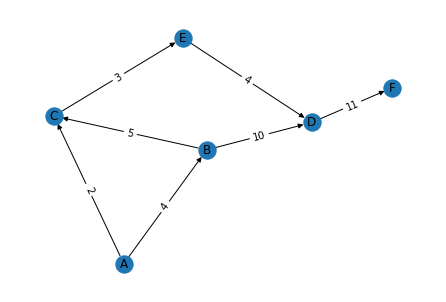

In [1]:
import matplotlib.pyplot as plt
import networkx as nx


# create directed graph and add edges with weights
G = nx.DiGraph()

G.add_edge("A", "B", weight=4)
G.add_edge("A", "C", weight=2)
G.add_edge("B", "C", weight=5)
G.add_edge("B", "D", weight=10)
G.add_edge("C", "E", weight=3)
G.add_edge("E", "D", weight=4)
G.add_edge("D", "F", weight=11)


# visualization
pos = nx.spring_layout(G, seed=2)  # positions for all nodes - seed for reproducibility
nx.draw(G, pos, with_labels=True)  # it provides a basic drawing tool, see the next cell for advanced drawing tool

# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.show()

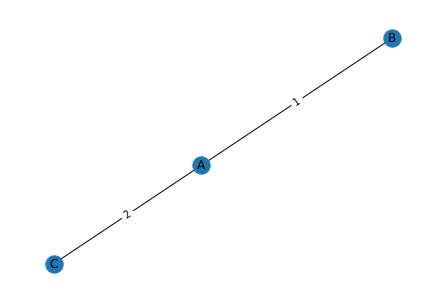

In [3]:
G1 = nx.Graph()

G1.add_edge("A", "B", cost=4, weight=1)
G1.add_edge("A", "C", cost=2, weight=2)



# visualization
pos = nx.spring_layout(G1, seed=2)  # positions for all nodes - seed for reproducibility
nx.draw(G1, pos, with_labels=True)  # it provides a basic drawing tool, see the next cell for advanced drawing tool

# edge weight labels
edge_labels = nx.get_edge_attributes(G1, "weight")
nx.draw_networkx_edge_labels(G1, pos, edge_labels)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.show()

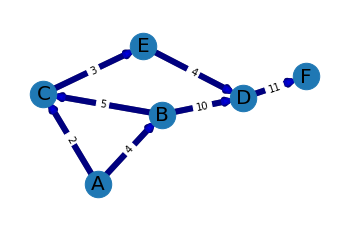

In [16]:
pos = nx.spring_layout(G, seed=2)

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, width=6)
nx.draw_networkx_edges(
    G, pos, width=6, alpha=0.5, edge_color="b", style="dashed"
)

# node labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")

# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

ax = plt.gca()
ax.margins(0.08)
plt.axis("off")
plt.show()

In [25]:
nx.get_edge_attributes(G, "weight")

{('A', 'B'): 4,
 ('A', 'C'): 2,
 ('B', 'C'): 5,
 ('B', 'D'): 10,
 ('C', 'E'): 3,
 ('D', 'F'): 11,
 ('E', 'D'): 4}

#### Find the shortest-path

In [4]:
nx.shortest_path(G, weight="weight", method='dijkstra')

# the result contains all shortest-paths without specifying source and target

{'A': {'A': ['A'],
  'B': ['A', 'B'],
  'C': ['A', 'C'],
  'E': ['A', 'C', 'E'],
  'D': ['A', 'C', 'E', 'D'],
  'F': ['A', 'C', 'E', 'D', 'F']},
 'B': {'B': ['B'],
  'C': ['B', 'C'],
  'D': ['B', 'D'],
  'E': ['B', 'C', 'E'],
  'F': ['B', 'D', 'F']},
 'C': {'C': ['C'],
  'E': ['C', 'E'],
  'D': ['C', 'E', 'D'],
  'F': ['C', 'E', 'D', 'F']},
 'D': {'D': ['D'], 'F': ['D', 'F']},
 'E': {'E': ['E'], 'D': ['E', 'D'], 'F': ['E', 'D', 'F']},
 'F': {'F': ['F']}}

In [5]:
# shortest path from A to F
nx.shortest_path(G, source='A', target='F',weight="weight", method='dijkstra')

['A', 'C', 'E', 'D', 'F']

In [6]:
# shortest path from A 
nx.shortest_path(G, source='A',weight="weight",method='dijkstra')

{'A': ['A'],
 'B': ['A', 'B'],
 'C': ['A', 'C'],
 'E': ['A', 'C', 'E'],
 'D': ['A', 'C', 'E', 'D'],
 'F': ['A', 'C', 'E', 'D', 'F']}

In [7]:
# shortest path to F 
nx.shortest_path(G, target='F',weight="weight",method='dijkstra')

{'F': ['F'],
 'D': ['D', 'F'],
 'B': ['B', 'D', 'F'],
 'E': ['E', 'D', 'F'],
 'C': ['C', 'E', 'D', 'F'],
 'A': ['A', 'C', 'E', 'D', 'F']}

#### Uncover dijkstra algorithm

I will use this wonderful [page](https://www.freecodecamp.org/news/dijkstras-shortest-path-algorithm-visual-introduction/) to explain the algorithm.

Can you write the code?

In [8]:
# Python program for Dijkstra's single
# source shortest path algorithm. The program is
# for adjacency matrix representation of the graph
class Graph():
 
    def __init__(self, vertices):
        self.V = vertices
        self.graph = [[0 for column in range(vertices)]
                      for row in range(vertices)]
 
    def printSolution(self, dist):
        print("Vertex \t Distance from Source")
        for node in range(self.V):
            print(node, "\t\t", dist[node])
 
    # A utility function to find the vertex with
    # minimum distance value, from the set of vertices
    # not yet included in shortest path tree
    def minDistance(self, dist, sptSet):
 
        # Initialize minimum distance for next node
        min = 1e7
 
        # Search not nearest vertex not in the
        # shortest path tree
        for v in range(self.V):
            if dist[v] < min and sptSet[v] == False:
                min = dist[v]
                min_index = v
 
        return min_index
 
    # Function that implements Dijkstra's single source
    # shortest path algorithm for a graph represented
    # using adjacency matrix representation
    def dijkstra(self, src):
 
        dist = [1e7] * self.V
        dist[src] = 0
        sptSet = [False] * self.V
 
        for cout in range(self.V):
 
            # Pick the minimum distance vertex from
            # the set of vertices not yet processed.
            # u is always equal to src in first iteration
            u = self.minDistance(dist, sptSet)
 
            # Put the minimum distance vertex in the
            # shortest path tree
            sptSet[u] = True
 
            # Update dist value of the adjacent vertices
            # of the picked vertex only if the current
            # distance is greater than new distance and
            # the vertex in not in the shortest path tree
            for v in range(self.V):
                if (self.graph[u][v] > 0 and
                   sptSet[v] == False and
                   dist[v] > dist[u] + self.graph[u][v]):
                    dist[v] = dist[u] + self.graph[u][v]
 
        self.printSolution(dist)

# Driver program
g = Graph(6)
g.graph = [[0, 4, 2, 0, 0, 0],
           [0, 0, 5, 10, 0, 0],
           [0, 0, 0, 0, 3, 0],
           [0, 0, 0, 0, 0, 11],
           [0, 0, 0, 4, 0, 0],
           [0, 0, 0, 0, 0, 0]
           ]
 
g.dijkstra(0)

Vertex 	 Distance from Source
0 		 0
1 		 4
2 		 2
3 		 9
4 		 5
5 		 20


## Travelling salesman problem

The travelling salesperson problem, also known as travelling salesman problem (TSP), asks the following question: "Given a list of cities and the distances between each pair of cities, what is the shortest possible route that visits each city exactly once and returns to the origin city?"

Each city is connected to other close by cities, or nodes, by airplanes, or by road or railway. Each of those links between the cities has one or more weights (or the cost) attached. The cost describes how "difficult" it is to traverse this edge on the graph, and may be given, for example, by the cost of an airplane ticket or train ticket, or perhaps by the length of the edge, or time required to complete the traversal. The salesman wants to keep both the travel costs, as well as the distance he travels as low as possible.

It is most easily expressed as a graph describing the locations of a set of nodes.

In general, the traveling salesman problem is hard to solve. If there is a way to break this problem into smaller component problems, the components will be at least as complex as the original one. This is what computer scientists call NP-hard problems.

In [35]:
pip install --upgrade networkx[default]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 kB 3.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 15.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 10.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 kB 20.5 MB/s eta 0:00:0000:01
DEPRECATION: mosek -version- has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of mosek or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https:/

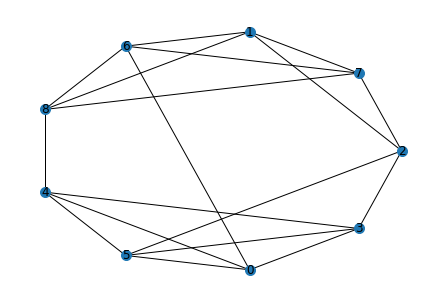

In [11]:
from networkx.algorithms import approximation
tsp = approximation.traveling_salesman_problem
G = nx.random_regular_graph(4,9)
nx.draw(G, with_labels=True, node_size=100, pos=nx.circular_layout(G))

tsp returns List of nodes in G along a path with an approximation of the minimal path through nodes.

In [29]:
tsp(G, cycle=False)

[5, 0, 6, 7, 2, 3, 4, 8, 7, 1]

In [34]:
tsp(G, nodes=[6,2,3,4], cycle=False)

[4, 3, 2, 7, 6]